In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

In [3]:
data_file_name = 'MNIST/diabetes.csv'
data = pd.read_csv(data_file_name)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
number_train_data = int(len(data)*0.65)
number_test_data = len(data) - number_train_data

feature_names = data.columns
feature_column_name = [feature_names[2], feature_names[5]]
label_column_name = data.columns[-1]
classes_name = data[label_column_name].unique()

train_data = data.iloc[:number_train_data]
test_data = data.iloc[number_train_data:]

print("Info of MNSIT used it in classifer")
print("Number of data : %d, number of training data : %d, and number of test data : %d "%(len(data),len(train_data),len(test_data)))

print("classifer used ( "+str(feature_column_name)+" )features")

Info of MNSIT used it in classifer
Number of data : 768, number of training data : 499, and number of test data : 269 
classifer used ( ['BloodPressure', 'BMI'] )features


In [106]:
class GaussianClassiferTwoDimension:
    def __init__(self):
        pass
    
    #creates method that claculate mean for each labels individually.
    def mean(self, feature_one, feature_two):
        return np.array([np.mean(feature_one) , np.mean(feature_two)])
    
    #creates method that clalculate covariance matrix for features data in model.
    def covariance_matrix(self, feature_one, feature_two):
        return np.cov(feature_one, feature_two)
    
    #creates method that calculates denisty function for multivariate gaussian.
    def pdf_multivariate(self, feature_one, feature_two, mu, new_x_feature):
        cov_matrix = self.covariance_matrix(feature_one, feature_two)
        rv = multivariate_normal(mu, cov_matrix)
        pdf_result = rv.pdf(new_x_feature)
        return pdf_result

    '''
        creates method that separates training data for each classes, and 
        calculates all paramter such, mean, covariance matrix, density function
        to fit model and predict new point comes.
    '''
    def predict(self, data, new_x_feature, target, target_col_name,feature_names):
        prob = list()
        for i in range(len(target)):
            data_for_feature_one = data[data[target_col_name] == target[i]][feature_names[0]].values
            data_for_feature_two = data[data[target_col_name] == target[i]][feature_names[1]].values
            mu = self.mean(data_for_feature_one, data_for_feature_two)
            pdf = self.pdf_multivariate(data_for_feature_one, data_for_feature_two, mu, new_x_feature) 
            prob.append((pdf,target[i]))
        prob.sort(key=lambda x:x[0], reverse = True)
        return prob[0]
    
    def scatter_features(self, data, target, target_col_name,feature_names):
        colors = ('red', 'blue', 'green')
        plt.figure(figsize=(8,8))
        plt.xlabel(feature_names[0],fontsize=15)
        plt.ylabel(feature_names[1],fontsize=15)
        plt.title('Scatter plot between two features', fontsize=20)
        for i, color in zip(target, colors):
            data_for_feature_one = data[data[target_col_name] == target[i]][feature_names[0]].values
            data_for_feature_two = data[data[target_col_name] == target[i]][feature_names[1]].values
            plt.scatter(data_for_feature_one, data_for_feature_two, c=color, s=50,label=target[i])
        plt.legend()

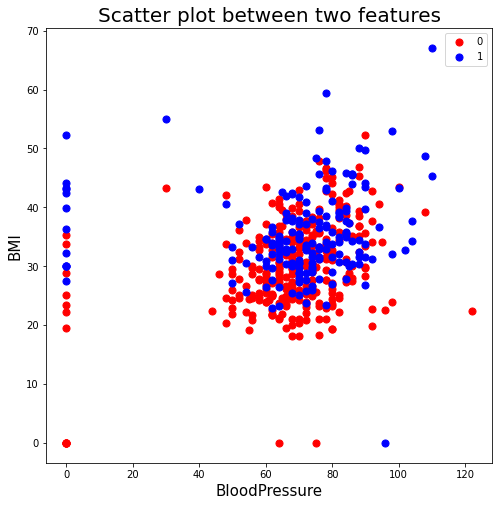

In [107]:
gs_2d = GaussianClassiferTwoDimension()
gs_2d.scatter_features(train_data, classes_name, label_column_name, feature_column_name)